Least squares weights: [-0.0844926  -0.02356211  0.22487123  0.59972247]
X^T · residuals = [9.94759830e-14 2.09610107e-13 1.28785871e-13 1.16351373e-13]


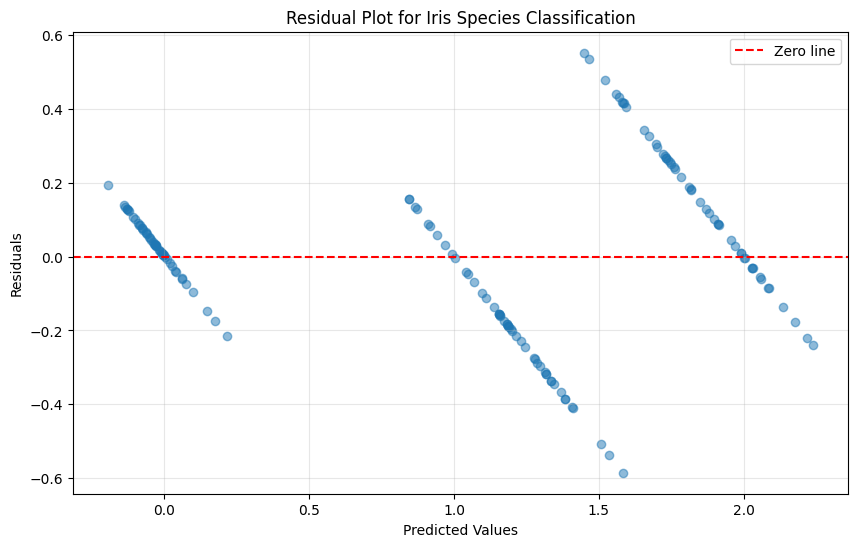

In [ ]:
# STARTER CODE for Question 3b
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from matplotlib import colors

# load data, make sure 'fisheriris.mat' is in your working directory
data = scipy.io.loadmat("fisheriris.mat")
X = data['meas']
y_text = data['species']

############################
# YOUR CODE BELOW
# Process and assign numerical values to
# 'y' according to your (a), make sure 'y' is a 1d numpy array.
# If dimensions are mismatching, you may find 'y = y.flatten()' useful.
y = np.array([0]*50 + [1]*50 + [2]*50) # setosa=0, versicolor=1, virginica=2
y = y.flatten()

# Compute the least squares weights
XtX = X.T @ X
Xty = X.T @ y 
w = np.linalg.solve(XtX, Xty)
print("Least squares weights:", w)

# Compute the residuals
y_hat = X.dot(w)
residuals = y - y_hat

# Check orthogonality (X^T r ≈ 0)
orthogonality = X.T.dot(residuals)
print("X^T · residuals =", orthogonality) # check if close to 0

# Make a plot
plt.figure(figsize=(10, 6))
plt.scatter(y_hat, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', label='Zero line')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Iris Species Classification")
plt.grid(True, alpha=0.3)
plt.legend()

In [6]:
# STARTER CODE
import numpy as np
import scipy.io
# load data, make sure 'fisheriris.mat' is in your working directory
data = scipy.io.loadmat("fisheriris.mat")
# training data
X = data['meas']
y_text = data['species']

############################
# YOUR CODE BELOW
# Process and assign numerical values to
# 'y' according to your (a), make sure 'y' is a 1d numpy array.
# If dimensions are mismatching, you may find 'y = y.flatten()' useful.

# number of random trials
N = 10_000
# array to store errors
errs = np.zeros(N)
# size of training set
num_train = 40

for i in np.arange(N):
  # initialize 0-length arrays for the train and holdout indices. These
  # arrays will be filled in the inner loop.
  idx_train = np.zeros(0, dtype=np.intp)
  idx_holdout = np.zeros(0, dtype=np.intp)
  # There are 3 label types and 50 samples of each type
  for label_type in range(3):
    # Choose a random ordering of the 50 samples
    r = np.random.permutation(50)

    # Add the first num_train indices of the random ordering to
    # the idx_train array
    idx_train = np.concatenate((idx_train,
                                50 * label_type + r[:num_train]))
    # Add the rest of the indices to the idx_holdout array
    idx_holdout = np.concatenate((idx_holdout,
                                  50 * label_type + r[num_train:]))

  # divide data and labels into the train and holdout sets
  Xt = X[idx_train]
  yt = y[idx_train]
  Xh = X[idx_holdout]
  yh = y[idx_holdout]

  ########################
  # YOUR CODE BELOW
  XtX = Xt.T @ Xt
  Xty = Xt.T @ yt
  w = np.linalg.solve(XtX, Xty)

  # Make predictions using the LS weights on holdout set
  y_pred = Xh @ w

  # Turn the real-valued predictions into class labels
  y_pred_class = np.round(y_pred).astype(int)

  # Compute the errors
  errs[i] = np.mean(y_pred_class != yh)

avg_error = np.mean(errs)
print(f"Average test error over {N} trials: {avg_error:.3f}")

Average test error over 10000 trials: 0.038


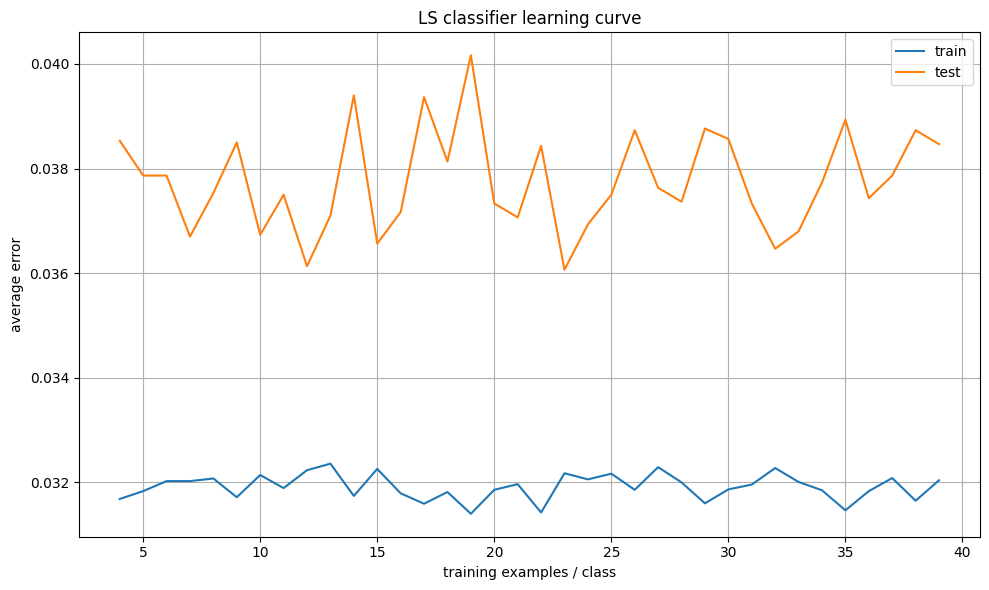

In [ ]:
# STARTER CODE for Question 3d
import numpy as np
import scipy.io
# load data, make sure 'fisheriris.mat' is in your working directory
data = scipy.io.loadmat("fisheriris.mat")
# training data
X = data['meas']
y_text = data['species']
############################
# YOUR CODE BELOW
# Process and assign numerical values to
# 'y' according to your (a), make sure 'y' is a 1d numpy array.
# If dimensions are mismatching, you may find 'y = y.flatten()' useful.
y = np.array([0]*50 + [1]*50 + [2]*50)
y = y.flatten()

# number of random trials
N = 1_000
# Min / Max size of the training set
min_num_train = 4
max_num_train = 40

# Arrays to store error rates
train_errs = np.zeros((max_num_train-min_num_train, N))
test_errs = np.zeros((max_num_train-min_num_train, N))

n_train_vals = np.arange(min_num_train, max_num_train)

for j, n_train in enumerate(n_train_vals):
  for i in np.arange(N):
    # initialize 0-length arrays for the train and holdout indices.
    # These arrays will be filled in the inner loop.
    idx_train = np.zeros(0, dtype=np.intp)
    idx_holdout = np.zeros(0, dtype=np.intp)

    # There are 3 label types and 50 samples of each type
    for label_type in range(3):
      # Choose a random ordering of the 50 samples
      r = np.random.permutation(50)
      # Add the first num_train indices of the random ordering to
      # the idx_train array
      idx_train = np.concatenate((idx_train,
      50 * label_type + r[:num_train]))
      # Add the rest of the indices to the idx_holdout array
      idx_holdout = np.concatenate((idx_holdout,
                                    50 * label_type + r[num_train:]))
    # divide data and labels into the train and holdout sets
    Xt = X[idx_train]
    yt = y[idx_train]
    Xh = X[idx_holdout]
    yh = y[idx_holdout]
    ########################
    # YOUR CODE BELOW
    XtX = Xt.T @ Xt
    Xty = Xt.T @ yt
    w = np.linalg.solve(XtX, Xty)
    
    # Make predictions on both train and test sets
    y_pred_train = np.round(Xt @ w).astype(int)
    y_pred_test = np.round(Xh @ w).astype(int)
    
    train_errs[j,i] = np.mean(y_pred_train != yt)
    test_errs[j,i] = np.mean(y_pred_test != yh)

###################
# YOUR CODE BELOW
# Make a plot of the train and test errors as a function of
# training set size
plt.figure(figsize=(10,6))
plt.plot(n_train_vals, train_errs.mean(1), label='train')
plt.plot(n_train_vals, test_errs.mean(1), label='test')
plt.xlabel('training examples / class')
plt.ylabel('average error')
plt.title('LS classifier learning curve')
plt.grid(True)
plt.legend()
plt.tight_layout()

In [17]:
### CODE for Question 3e
# Select only sepal length (column 0) and petal length (column 2)
X_reduced = X[:, [0, 2]]  # Keep only columns 0 and 2

N = 1_000
num_train = 40
errs = np.zeros(N)

for i in np.arange(N):
    idx_train = np.zeros(0, dtype=np.intp)
    idx_holdout = np.zeros(0, dtype=np.intp)
    for label_type in range(3):
        r = np.random.permutation(50)
        idx_train = np.concatenate((idx_train,
                                  50 * label_type + r[:num_train]))
        idx_holdout = np.concatenate((idx_holdout,
                                    50 * label_type + r[num_train:]))
    
    # Get training and holdout sets using reduced features
    Xt = X_reduced[idx_train]
    yt = y[idx_train]
    Xh = X_reduced[idx_holdout]
    yh = y[idx_holdout]
    
    # Compute LS weights
    XtX = Xt.T @ Xt
    Xty = Xt.T @ yt
    w = np.linalg.solve(XtX, Xty)

    y_pred = np.round(Xh @ w).astype(int)
    errs[i] = np.mean(y_pred != yh)

print(f"Average test error using only sepal length and petal length: {np.mean(errs):.3f}")

Average test error using only sepal length and petal length: 0.035


In [18]:
### STARTER CODE for Question 4c
import numpy as np
import numpy.linalg as la
p = np.array(
  [[0, 4, 3],
  [3, 6, 0],
  [1, 2, 0]]
)
### YOUR CODE BELOW
c1 = p[:, 0]
c2 = p[:, 1]
u1 = c1 / la.norm(c1)
proj = np.dot(u1, c2) * u1
v2 = c2 - proj
u2 = v2 / la.norm(v2)
U = np.column_stack((u1, u2))
print("result of GS: \n", U)

result of GS: 
 [[0.00000000e+00 1.00000000e+00]
 [9.48683298e-01 2.22044605e-16]
 [3.16227766e-01 0.00000000e+00]]
